# Machine Learning for Regression

Data: https://www.kaggle.com/CooperUnion/cardataset

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Preparation (Video 2.2)

In [2]:
# read data
df = pd.read_csv("../data/data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Notes**

* MSRP is the price, we want to predict
* Make column names consistent (make all lower case and replace blank with under score)
* Make entries consistent (sometimes they are all caps, sometimes not)

In [3]:
# Make column names consistent
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# Make entries consistent
## find all strings (dtype = object)
## use "index" to get the index of the resulting series
strings = df.dtypes[df.dtypes == "object"].index
strings

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [5]:
# Make entries names consistent
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis (Video 2.3)

* Print some statistics of each column

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

**Plot Distribution of prices (MSRP)**

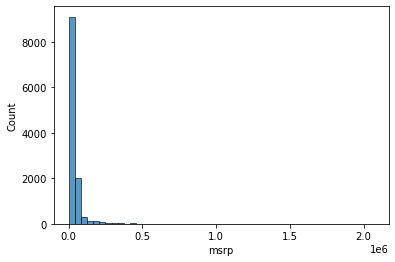

In [8]:
sns.histplot(df.msrp, bins=50);

**Conclusions**

* A lot of cheap cars, very few very expensive cars
* MSRP is a long-tail distribution
* Zoom in:

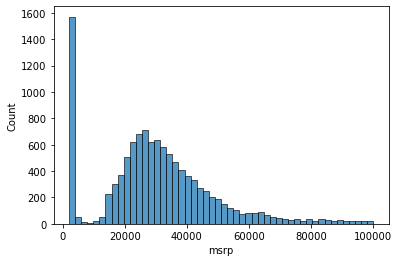

In [9]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50);

**Notes**

* This kind of distribution is difficult for ML models
* We want to get rid of the tail
* Apply logarithm to the price
* Use np.log1p, this function takes the log, but adds 1 before applying it (this is done to be sure that we don't get 0 values)

In [10]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

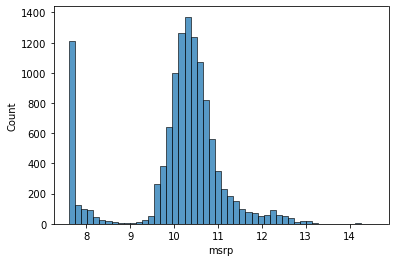

In [11]:
sns.histplot(price_logs, bins=50);

**Notes**

* Now the distribution looks more like a normal distribution
* except the peak at x = 1000 (this is probably the minimum price that can be put)

**Missing Values**

In [12]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting up the validation ramework (Video 2.4)

* Split data into 3 parts for training ,validation and testing
* What is the total length of the dataframe?
* Use 20% for validation and testing
* Shuffle the data, beore splitting

In [13]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
print(f"n_train: {n_train}, n_val: {n_val}, n_test: {n_test}")

n_train: 7150, n_val: 2382, n_test: 2382


In [14]:
# take numbers from 0 to n and shuffle them
idx = np.arange(n)
print(idx)
# set random seed to make it reproducable
np.random.seed(2)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [17]:
# check length of the 3 datasets
print(len(df_train), len(df_val), len(df_test))

7150 2382 2382


In [18]:
# reset inde
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [20]:
# apply log to target y
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [21]:
# delet msrp from dataframe
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

## Linear Regression (Video 2.5)

* Use only 3 columns as features: engine_hp, city_mpg and popolarity

In [22]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [23]:
xi = [453, 11, 86]

In [24]:
# For the moment take weights as given
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [25]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + xi[j] * w[j]
    
    return pred

In [26]:
linear_regression(xi)

12.312

**Notes**

* If we wouldn't know anything about the car, w0(=7.17) would be the predicted price
* The result is based on the log1p transformed data, i.e. to get the actual price we neet to calculate np.exp(12.312)-1 = np.expm1(12.312)

In [27]:
np.expm1(12.312)

222347.2221101062

## Linear Regression Vector Form (Video 2.6)

In [28]:
# dot product
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j]*w[j]
    
    return res

In [29]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [30]:
# include w0 into w and use x0=1
w_new = [w0] + w
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [31]:
linear_regression(xi)

12.312

In [32]:
# several samples
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [33]:
# prediction for several samples
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [34]:
def linear_regression(X):
    return X.dot(w_new)

In [35]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training a Linear Regression Model (Video 2.7)
* Implement w = (XTX)-1 XT y

In [36]:
X = [[148, 24, 1385],
     [132, 25, 2031],
     [453, 11, 86],
     [158, 24, 1385],
     [172, 25, 201],
     [413, 11, 86],
     [148, 54, 1385],
     [38, 25, 2031],
     [453, 11, 86]]
X = np.array(X)

In [37]:
# add bias term
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
X = np.column_stack([ones, X])

In [39]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [40]:
XTX = X.T.dot(X)

In [41]:
XTX_inv = np.linalg.inv(XTX)

In [42]:
w_full = XTX_inv.dot(X.T).dot(y)

In [43]:
w0 = w_full[0]
w = w_full[1:]

In [44]:
w0, w

(12007.496227578155, array([   9.43467781, -145.37082047,    6.28239542]))

In [45]:
# put everything in a function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [46]:
X = [[148, 24, 1385],
     [132, 25, 2031],
     [453, 11, 86],
     [158, 24, 1385],
     [172, 25, 201],
     [413, 11, 86],
     [148, 54, 1385],
     [38, 25, 2031],
     [453, 11, 86]]
X = np.array(X)

In [47]:
train_linear_regression(X, y)

(12007.496227578155, array([   9.43467781, -145.37082047,    6.28239542]))

## Car Price Baseline Model (Video 2.8)

In [48]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [49]:
# extract some features
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [50]:
X_train = df_train[base].values

In [51]:
# use function from previous section
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

In [52]:
# we get nan values, because the data contains missing values
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [53]:
# Fill missing values with 0
X_train = df_train[base].fillna(0).values

**Notes**
* Here we use 0 to replace the missing values
* This makes th model ignore the missing features
* 0 is not always the best choice for replacing missing values

In [54]:
# use function from previous section
w0, w = train_linear_regression(X_train, y_train)

In [55]:
# Make predictions
y_pred = w0 + X_train.dot(w)

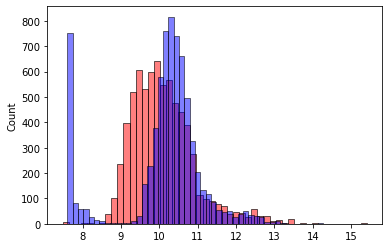

In [56]:
# plot predictions
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50);

## RMSE (Video 2.9)

* Quantify the error of the model

In [57]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [58]:
rmse(y_train, y_pred)

0.7554192603920132

## Validating the Model (Video 2.20)

* Apply model to validation data

In [59]:
# This function prepares train, valid and tet data
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [60]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

0.7616530991301601

## Simple Feature Engineering (Video 2.11)
* Improve the model
* An important feature of the price is the age of a car

In [61]:
df_train.year.max()

2017

In [62]:
# age of a car
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [63]:
# Add age to dataframe
def prepare_X(df):
    df = df.copy()
    
    df["age"] = 2017 - df.year
    features = base + ["age"]
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [64]:
X_train = prepare_X(df_train)

In [65]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

0.5172055461058335

**Notes**
* The model improved, the RMSE reduced
* Plot predictions

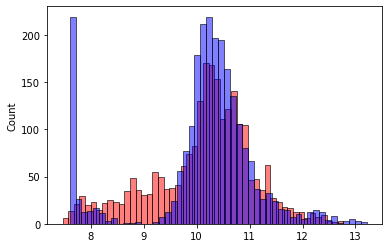

In [66]:
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_val, color="blue", alpha=0.5, bins=50);

## Categorical Variables (Video 2.12)
* Typically strings (here e.g. Make, Model, etc.)
* Number of "Doors" looks numerical, but it is a categorical variable
* Want to use these type of variable for our model
* Typically: represent as one-hot-encoded 
    * i.e. one categorical column is represented with multiple binary columns

In [67]:
# Add categorical variable: "num_of_doors"
def prepare_X(df):
    df = df.copy() # we don't want to modify the original df
    features = base.copy() # we don't want to modify the base list
    
    df["age"] = 2017 - df.year
    features.append("age")
    
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [68]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

0.5157995641502353

**Notes**
* Only very slight improvement
* The feature "nr of doors" is not so helpfull
* Look at feature "Make"

In [69]:
# how many different car types are there?
df.make.nunique()

48

In [70]:
# most popular cars
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [71]:
# Add categorical variable: makes
def prepare_X(df):
    df = df.copy() # we don't want to modify the original df
    features = base.copy() # we don't want to modify the base list
    
    df["age"] = 2017 - df.year
    features.append("age")
    
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")
        
    for v in makes:
        df[f"make_{v}"] = (df.make == v).astype(int)
        features.append(f"make_{v}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [72]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

0.5076038849557035

**Notes**
* results improved

In [73]:
# more categorical variables 
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 
              'vehicle_size', 'vehicle_style']

In [74]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [75]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [76]:
# Add more categorical variable
def prepare_X(df):
    df = df.copy() # we don't want to modify the original df
    features = base.copy() # we don't want to modify the base list
    
    df["age"] = 2017 - df.year
    features.append("age")
    
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype(int)
        features.append(f"num_doors_{v}")
        
    for c, values in categories.items():
        for v in values:
            df[f"{c}_{v}"] = (df[c] == v).astype(int)
            features.append(f"{c}_{v}")
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [77]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

23.370682839235876

**Notes**
* This value is much higher than our previous values

In [78]:
w0

8076722330785280.0

In [79]:
w

array([ 2.19613378e-01, -1.23924815e+01, -1.55565980e-01,  1.72019346e+00,
       -7.48030012e-04,  8.57866963e-01,  1.10007186e+03,  1.10703242e+03,
        1.08970027e+03, -1.64182016e+00,  8.70500716e-01,  1.40383685e+00,
       -5.06840411e+00,  1.74186165e+00,  9.89781234e+01,  8.76598208e+01,
        9.34493805e+01,  9.43490986e+01,  1.07661838e+02, -6.54670381e+15,
       -6.54670381e+15, -6.54670381e+15, -6.54670381e+15, -6.54670381e+15,
       -1.53001852e+15, -1.53001852e+15, -1.53001852e+15, -1.53001852e+15,
        2.69409282e+00,  8.23531258e-01,  7.64925861e-01, -7.08728902e-02,
       -6.58368806e+00,  1.12149550e+01,  1.25863344e+01,  1.72957401e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

* Some of the weights are very large

## Regularization (Video 2.13)

* It may happen that the matrix XTX contains dublicate columns

In [81]:
# assume this X
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]]

X = np.array(X)

In [84]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

**Notes**
* Second and third column have the same values
* The inverse of this matrix does not exist


In [85]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

* In real data, the data is not alwazy exactly clean, e.g.:

In [87]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00000001]]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [88]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

* Now the columns are not dublicates anymore

In [90]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

* The weights get really high values
* Apply this to some values y

In [92]:
y = [1,2,3,1,2,3]
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

* This leads to reasonable values in the first column, but for the second and third, we get some huge numbers
* To solve this problem we can add a small number to the diagonal

In [100]:
# Small example for XTX
XTX = [
    [1,2,2],
    [2,1,1.00000001],
    [2,1.0000001,1]]

XTX = np.array(XTX)

In [101]:
np.linalg.inv(XTX)

array([[-3.33333337e-01,  6.06060608e-01,  6.06060605e-02],
       [ 6.06060604e-02, -9.09090912e+06,  9.09090909e+06],
       [ 6.06060608e-01,  9.09090882e+06, -9.09090912e+06]])

In [102]:
# now add a small number to the diagonal
XTX = XTX + 0.01*np.eye(3)
XTX = np.array(XTX)

In [103]:
np.linalg.inv(XTX)

array([[ -0.33668907,   0.33501248,   0.3350155 ],
       [  0.3350155 ,  49.91568397, -50.0848668 ],
       [  0.33501248, -50.08486527,  49.91568397]])

* After adding the small number to the diagonal, the weights are smaller
* This helps, that the matrix is not singular any more
* This is called **Regularization** (Control of the weights)
* The value we add, is a parameter
* Now modify the training function

In [104]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [105]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

# prediction
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# validation
rmse(y_val, y_pred)

0.45652199013026107

**Notes**
* The error is much smaller, than the non-regularized regression
* It is also better than our model without hte categorical values
* Now we need to find the best regularization parameter (r)

## Tuning the Model (Video 2.14)

* Try different values for r

In [107]:
for r in [0.0, 0.00001, 0.0001, 0.01, 0.1, 1, 10]:
    
    # training
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    # prediction
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    # validation
    score = rmse(y_val, y_pred)
    print(f"r: {r}, w0: {w0}, score: {score}")

r: 0.0, w0: 8076722330785280.0, score: 23.370682839235876
r: 1e-05, w0: 8.796876877765598, score: 0.4565170168175915
r: 0.0001, w0: 6.33106628120822, score: 0.4565170633148812
r: 0.01, w0: 6.276603763430729, score: 0.45652199013026107
r: 0.1, w0: 6.191208658848039, score: 0.4565692763039577
r: 1, w0: 5.634896667867927, score: 0.45722043179962046
r: 10, w0: 4.283980108970553, score: 0.470145693209949


* r=0.01 seems to be a good value, afterwards the rmse starts to increase

## Using the Model (Video 2.15)

* Train the final model on train and validation set
* Test the model on the test data

In [110]:
# combine df_train and df_val
df_full_train = pd.concat([df_train, df_val])

In [114]:
df_full_train = df_full_train.reset_index(drop=True)

In [115]:
# Data preparation
X_full_train = prepare_X(df_full_train)

In [116]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [117]:
y_full_train = np.concatenate([y_train, y_val])

In [118]:
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [120]:
# train the model
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.01)

In [124]:
# prepare test dataset
# prediction
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

# validation
score = rmse(y_test, y_pred)
print(f"score: {score}")

score: 0.45177875809546403


* RMSE is very similar on test set
* This is a good sign, that the model ca generalize well

**Apply this model to a specific car**

In [126]:
# Usually this data is saved as a dictionary
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

* The prepare_X function needs a dataframe as input

In [127]:
# Convert dictionary to dataframe
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [128]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [130]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.462575851224381

* Compare with real value (y_test[20])

In [133]:
# compare with y_test
y_test[20]

10.463131911491967

* To get the price the exponetial has to be taken of this number, because we took the logarithm before training

In [132]:
# model prediction
np.expm1(y_pred)

34980.54274477886

In [134]:
# real price
np.expm1(y_test[20])

35000.00000000001

* The predicted price is close to the real price